[[0.6866052  0.3133948 ]
 [0.56469    0.43531   ]
 [0.558255   0.441745  ]
 ...
 [0.5468196  0.4531804 ]
 [0.50189435 0.49810567]
 [0.53267956 0.46732047]]


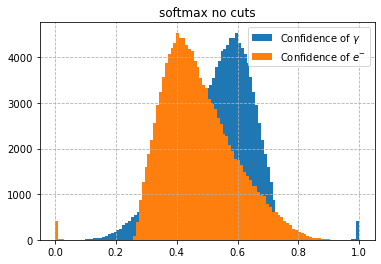

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm


softmax = np.load('softmax.npy')

print(softmax)
array_0 = softmax[:, 0]
array_1 = softmax[:, 1]
gamma_mean = 'gamma mean', np.round(np.mean(array_0), 5)
electron_mean = 'electron mean', np.round(np.mean(array_1), 5)

#plt.text(0.01, 10000, gamma_mean)
#plt.text(0.01, 8000, electron_mean)

plt.title('softmax no cuts')
y0 = plt.hist(array_0, bins = 100, label = 'Confidence of $\gamma$')
y1 = plt.hist(array_1, bins = 100, label = 'Confidence of $e^{-}$')
plt.grid(linestyle = '--')
plt.legend()
plt.savefig('softmax.png', bbox_inches = 'tight', facecolor='w')

electrons  63750
gammas  61250


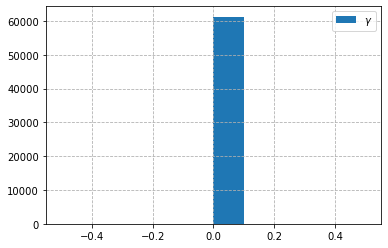

In [3]:
labels = np.load('labels.npy')
#labels = list(labels)
label0 = []
label1 = []

for l in labels:
    #print(l)
    if l == 0:
        label0.append(l)
    else:
        label1.append(l)
                             
label1 = np.array(label1)
label0 = np.array(label0)
print('electrons ', len(label1))
print('gammas ', len(label0))
plt.hist(label0, label = '$\gamma$')
plt.legend()
plt.grid(linestyle = '--')
#plt.savefig('gamma.png', transparent = False, facecolor='w')

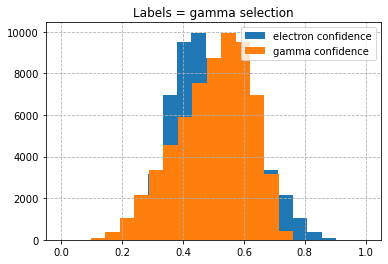

In [4]:
labels = np.load('labels.npy')
softmax = np.load('softmax.npy')


softmax0 = softmax[labels == 0]
softmax1 = softmax[labels == 1]

softmax_eSelection_1 = softmax1[:, 1]
softmax_gSelection_1 = softmax1[:, 0]

electron_mean_1 = 'electron mean', np.round(np.mean(softmax_eSelection_1), 5)
gamma_mean_1 = 'gamma mean', np.round(np.mean(softmax_gSelection_1), 5)

#plt.text(0.01, 20000, gamma_mean_1)
#plt.text(0.01, 15000, electron_mean_1)

plt.title('Labels = gamma selection')
plt.hist(softmax_eSelection_1, bins = 20, label = 'electron confidence')
plt.hist(softmax_gSelection_1, bins = 20, label = 'gamma confidence')
#plt.hist(softmax1, bins = 20, label = 'electron selection')
plt.grid(linestyle = '--')
plt.legend()
#plt.savefig('softmaxelectron.png', facecolor='w')

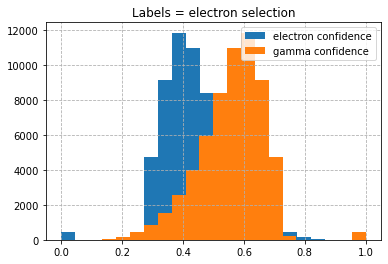

In [5]:
labels = np.load('labels.npy')
softmax = np.load('softmax.npy')


softmax0 = softmax[labels == 0]
softmax1 = softmax[labels == 1]

softmax_eSelection_0 = softmax0[:, 1]
softmax_gSelection_0 = softmax0[:, 0]

electron_mean_0 = 'electron mean', np.round(np.mean(softmax_eSelection_0), 5)
gamma_mean_0 = 'gamma mean', np.round(np.mean(softmax_gSelection_0), 5)

#gamma_mean_0 = 'gamma mean', np.round(gamma_mean_0, 5)

#plt.text(0.01, 20000, gamma_mean_0)
#plt.text(0.01, 15000, electron_mean_0)

plt.title('Labels = electron selection')
plt.hist(softmax_eSelection_0, bins = 20, label = 'electron confidence')
plt.hist(softmax_gSelection_0, bins = 20, label = 'gamma confidence')
plt.grid(linestyle = '--')
plt.legend()
#plt.savefig('softmaxgamma.png', facecolor='w')

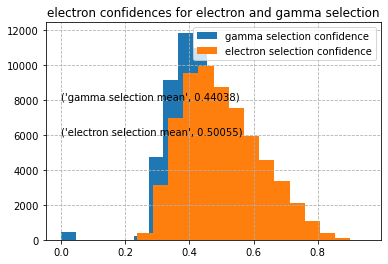

In [10]:
labels = np.load('labels.npy')
softmax = np.load('softmax.npy')


softmax0 = softmax[labels == 0]
softmax1 = softmax[labels == 1]


electron_mean_0 = 'gamma selection mean', np.round(np.mean(softmax_eSelection_0), 5)
electron_mean_1 = 'electron selection mean', np.round(np.mean(softmax_eSelection_1), 5)

#gamma_mean_0 = 'gamma mean', np.round(gamma_mean_0, 5)

plt.text(0, 8000, electron_mean_0)
plt.text(0, 6000, electron_mean_1)

plt.title('electron confidences for electron and gamma selection')
plt.hist(softmax_eSelection_0, bins = 20, label = 'gamma selection confidence')
plt.hist(softmax_eSelection_1, bins = 20, label = 'electron selection confidence')
plt.grid(linestyle = '--')
plt.legend()
plt.savefig('electronconfidences.png', facecolor='w')

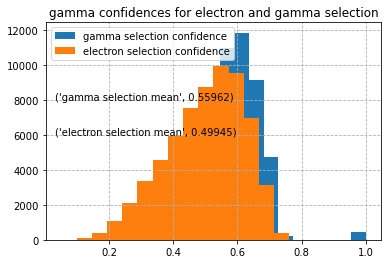

In [13]:
labels = np.load('labels.npy')
softmax = np.load('softmax.npy')


softmax0 = softmax[labels == 0]
softmax1 = softmax[labels == 1]


gamma_mean_0 = 'gamma selection mean', np.round(np.mean(softmax_gSelection_0), 5)
gamma_mean_1 = 'electron selection mean', np.round(np.mean(softmax_gSelection_1), 5)

#gamma_mean_0 = 'gamma mean', np.round(gamma_mean_0, 5)

plt.text(0.03, 8000, gamma_mean_0)
plt.text(0.03, 6000, gamma_mean_1)

plt.title('gamma confidences for electron and gamma selection')
plt.hist(softmax_gSelection_0, bins = 20, label = 'gamma selection confidence')
plt.hist(softmax_gSelection_1, bins = 20, label = 'electron selection confidence')
plt.grid(linestyle = '--')
plt.legend()
plt.savefig('gammaconfidences.png', facecolor='w')

In [127]:
print(labels)
labels0 = []
labels0 = labels[labels == 0]
print(len(labels0))
labels1 = []
labels1 = labels[labels == 1]
print(len(labels1))

[0 0 0 ... 1 1 0]
126669
131915


Text(-0.9, 15000, "('mean = ', 0.11924)")

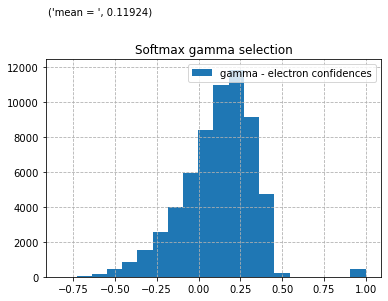

In [14]:
subtracted0 = softmax0[:, 0] - softmax0[:, 1]
plt.grid(linestyle = '--')
plt.title('Softmax gamma selection')
plt.hist(subtracted0, bins = 20, label = 'gamma - electron confidences')
plt.legend()
mean = 'mean = ', np.round(np.mean(subtracted0), 5)
plt.text(-0.9, 15000, mean)
#plt.savefig('sub0.png', facecolor = 'w')

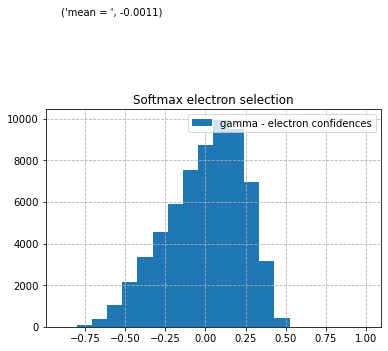

In [15]:
subtracted1 = softmax1[:, 0] - softmax1[:, 1]
plt.grid(linestyle = '--')
plt.title('Softmax electron selection')
plt.hist(subtracted1, bins = 20, label = 'gamma - electron confidences')
plt.legend()
mean = 'mean = ', np.round(np.mean(subtracted1), 5)
plt.text(-0.9, 15000, mean)
#plt.savefig('sub1.png', facecolor = 'w')

In [5]:
#first letter is selection
#second letter is what confidence you're computing
g_g_conf = np.mean(softmax0[:, 0])
g_e_conf = np.mean(softmax0[:, 1])
e_g_conf = np.mean(softmax1[:, 0])
e_e_conf = np.mean(softmax1[:, 1])

sub_1 = np.mean(subtracted1)
sub_0 = np.mean(subtracted0)

print('mean for gamma selection, gamma confidence = ', g_g_conf)
print('mean for gamma selection, electron confidence = ', g_e_conf)
print('mean for electron selection, gamma confidence = ', e_g_conf)
print('mean for electron selection, electron confidence = ', e_e_conf)
print('mean for gamma - electron for gamma selection = ', sub_1)
print('mean for gamma - electron for electron selection = ', sub_0)

mean for gamma selection, gamma confidence =  0.5195742
mean for gamma selection, electron confidence =  0.4804258
mean for electron selection, gamma confidence =  0.50295717
mean for electron selection, electron confidence =  0.49704278
mean for gamma - electron for gamma selection =  0.00591436
mean for gamma - electron for electron selection =  0.039148472


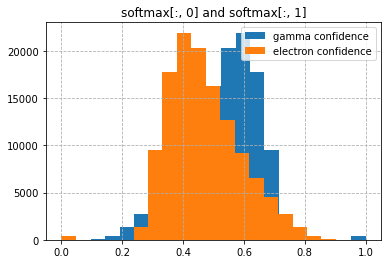

In [17]:
plt.hist(softmax[:, 0], bins = 20, label = 'gamma confidence')
plt.hist(softmax[:, 1], bins = 20, label = 'electron confidence')
plt.grid(linestyle = '--')
plt.title('softmax[:, 0] and softmax[:, 1]')
plt.legend()
#plt.savefig('softmaxstraight.png', facecolor = 'w')

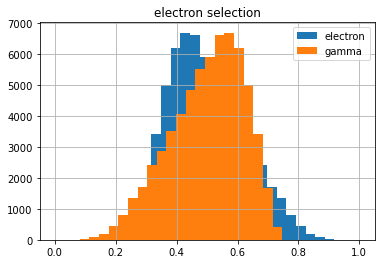

In [30]:
gamma = softmax[:,0]
electron = softmax[:, 1]
gamma_e_sel = gamma[labels == 1]
gamma_g_sel = gamma[labels == 0]
electron_e_sel = electron[labels == 1]
electron_g_sel = electron[labels == 0]

plt.hist(electron_e_sel, bins = 30, label = 'electron')
plt.hist(gamma_e_sel, bins = 30, label = 'gamma')
plt.grid()
plt.legend()
plt.title('electron selection')
plt.savefig('e_sel.png', facecolor = 'w')

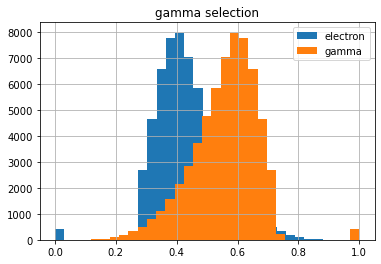

In [31]:
plt.hist(electron_g_sel, bins = 30, label = 'electron')
plt.hist(gamma_g_sel, bins = 30, label = 'gamma')
plt.grid()
plt.legend()
plt.title('gamma selection')
plt.savefig('g_sel.png', facecolor = 'w')

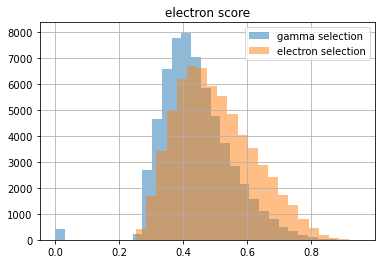

In [39]:
plt.hist(electron_g_sel, alpha = 0.5,bins = 30, label = 'gamma selection')
plt.hist(electron_e_sel, alpha = 0.5,bins = 30, label = 'electron selection')
plt.grid()
plt.legend()
plt.title('electron score')
plt.savefig('e_sel_2.png', facecolor = 'w')

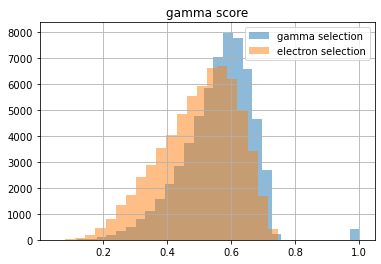

In [40]:
plt.hist(gamma_g_sel, alpha = 0.5, bins = 30, label = 'gamma selection')
plt.hist(gamma_e_sel, alpha = 0.5, bins = 30, label = 'electron selection')
plt.grid()
plt.legend()
plt.title('gamma score')
plt.savefig('g_sel_2.png', facecolor = 'w')